<h1> Bumpy Chart </h1>

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import seaborn as sns
import os
import datetime
import json

In [2]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

In [3]:
epl = Image.open(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/epl.png")
)

season_dict = json.load(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/epl.json")
)

player_dict = json.load(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/"
            "percentile.json")
)

In [4]:
font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        "robotoslab/RobotoSlab%5Bwght%5D.ttf")

In [5]:
matchday = range(1,39)
dfs = []
for i in matchday:
    site = requests.get('https://www.worldfootball.net/schedule/eng-premier-league-2022-2023-spieltag/{}/'.format(i)).text
    df = pd.read_html(site)[3]
    df['Matchday'] = 'Matchday ' + str(i)
    df['Matchday Num'] = str(i)
    df['PL Position'] = (df.index + 1).astype(str)
    dfs.append(df)
    
final_df = pd.concat(dfs, ignore_index = True)

In [6]:
final_df = final_df.drop(columns = ['Team'])

In [7]:
final_df = final_df.drop(columns = ['#'])

In [8]:
final_df = final_df.rename(columns={"Team.1": "Team"})

In [9]:
final_df

,Team,M.,W,D,L,goals,Dif.,Pt.,Matchday,Matchday Num,PL Position
0,Tottenham Hotspur,1,1,0,0,4:1,3,3,Matchday 1,1,1
1,AFC Bournemouth,1,1,0,0,2:0,2,3,Matchday 1,1,2
2,Arsenal FC,1,1,0,0,2:0,2,3,Matchday 1,1,3
3,Manchester City,1,1,0,0,2:0,2,3,Matchday 1,1,4
4,Newcastle United,1,1,0,0,2:0,2,3,Matchday 1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
755,Nottingham Forest,38,9,11,18,38:68,-30,38,Matchday 38,38,16
756,Everton FC,38,8,12,18,34:57,-23,36,Matchday 38,38,17
757,Leicester City,38,9,7,22,51:68,-17,34,Matchday 38,38,18
758,Leeds United,38,7,10,21,48:78,-30,31,Matchday 38,38,19


In [10]:
matchday_columns = ["Week {}".format(i + 1) for i in range(0,38)]

In [11]:
ult_df = pd.DataFrame(columns = matchday_columns + ['Team'])

In [12]:
all_teams = final_df.Team.unique()

In [13]:
for i, team in enumerate(all_teams):
#     print(i)
    
    team_positions = final_df[final_df.Team == team].iloc[:,10].values
    
    some_df = pd.DataFrame([team_positions], columns = matchday_columns)
    some_df['Team'] = team
    ult_df = ult_df.append(some_df, ignore_index=True)
    
    

In [14]:
ult_df = ult_df.T

In [15]:
ult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Week 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Week 2,4,11,2,1,5,8,6,7,3,13,15,12,20,14,18,9,16,10,19,17
Week 3,4,15,1,2,6,5,3,12,8,7,19,16,14,18,17,13,9,10,20,11
Week 4,3,17,1,2,7,4,5,6,10,11,20,9,8,19,18,15,12,14,16,13
Week 5,3,16,1,2,12,4,7,10,11,8,20,6,5,18,17,19,13,15,14,9
Week 6,3,13,1,2,11,4,9,6,8,10,20,7,5,14,16,17,15,19,18,12
Week 7,4,15,1,2,10,3,8,11,7,9,20,6,5,16,17,13,12,19,18,14
Week 8,4,13,1,2,10,3,9,11,8,5,20,7,6,17,15,12,14,19,18,16
Week 9,4,14,1,2,6,3,11,8,10,7,19,5,9,18,13,12,15,20,17,16
Week 10,3,13,1,2,5,4,11,6,10,9,20,8,7,18,15,12,14,19,16,17


In [16]:
ult_df.columns = ult_df.iloc[-1].values

In [17]:
ult_df = ult_df.iloc[:-1]

In [18]:
ult_df.head()

,Tottenham Hotspur,AFC Bournemouth,Arsenal FC,Manchester City,Newcastle United,Brighton & Hove Albion,Leeds United,Chelsea FC,Brentford FC,Fulham FC,Leicester City,Liverpool FC,Manchester United,Wolverhampton Wanderers,Everton FC,Aston Villa,Crystal Palace,Nottingham Forest,West Ham United,Southampton FC
Week 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Week 2,4,11,2,1,5,8,6,7,3,13,15,12,20,14,18,9,16,10,19,17
Week 3,4,15,1,2,6,5,3,12,8,7,19,16,14,18,17,13,9,10,20,11
Week 4,3,17,1,2,7,4,5,6,10,11,20,9,8,19,18,15,12,14,16,13
Week 5,3,16,1,2,12,4,7,10,11,8,20,6,5,18,17,19,13,15,14,9


In [19]:
ult_df.dtypes

Tottenham Hotspur          object
AFC Bournemouth            object
Arsenal FC                 object
Manchester City            object
Newcastle United           object
Brighton & Hove Albion     object
Leeds United               object
Chelsea FC                 object
Brentford FC               object
Fulham FC                  object
Leicester City             object
Liverpool FC               object
Manchester United          object
Wolverhampton Wanderers    object
Everton FC                 object
Aston Villa                object
Crystal Palace             object
Nottingham Forest          object
West Ham United            object
Southampton FC             object
dtype: object

In [20]:
ult_df = ult_df.apply(pd.to_numeric, errors='coerce')

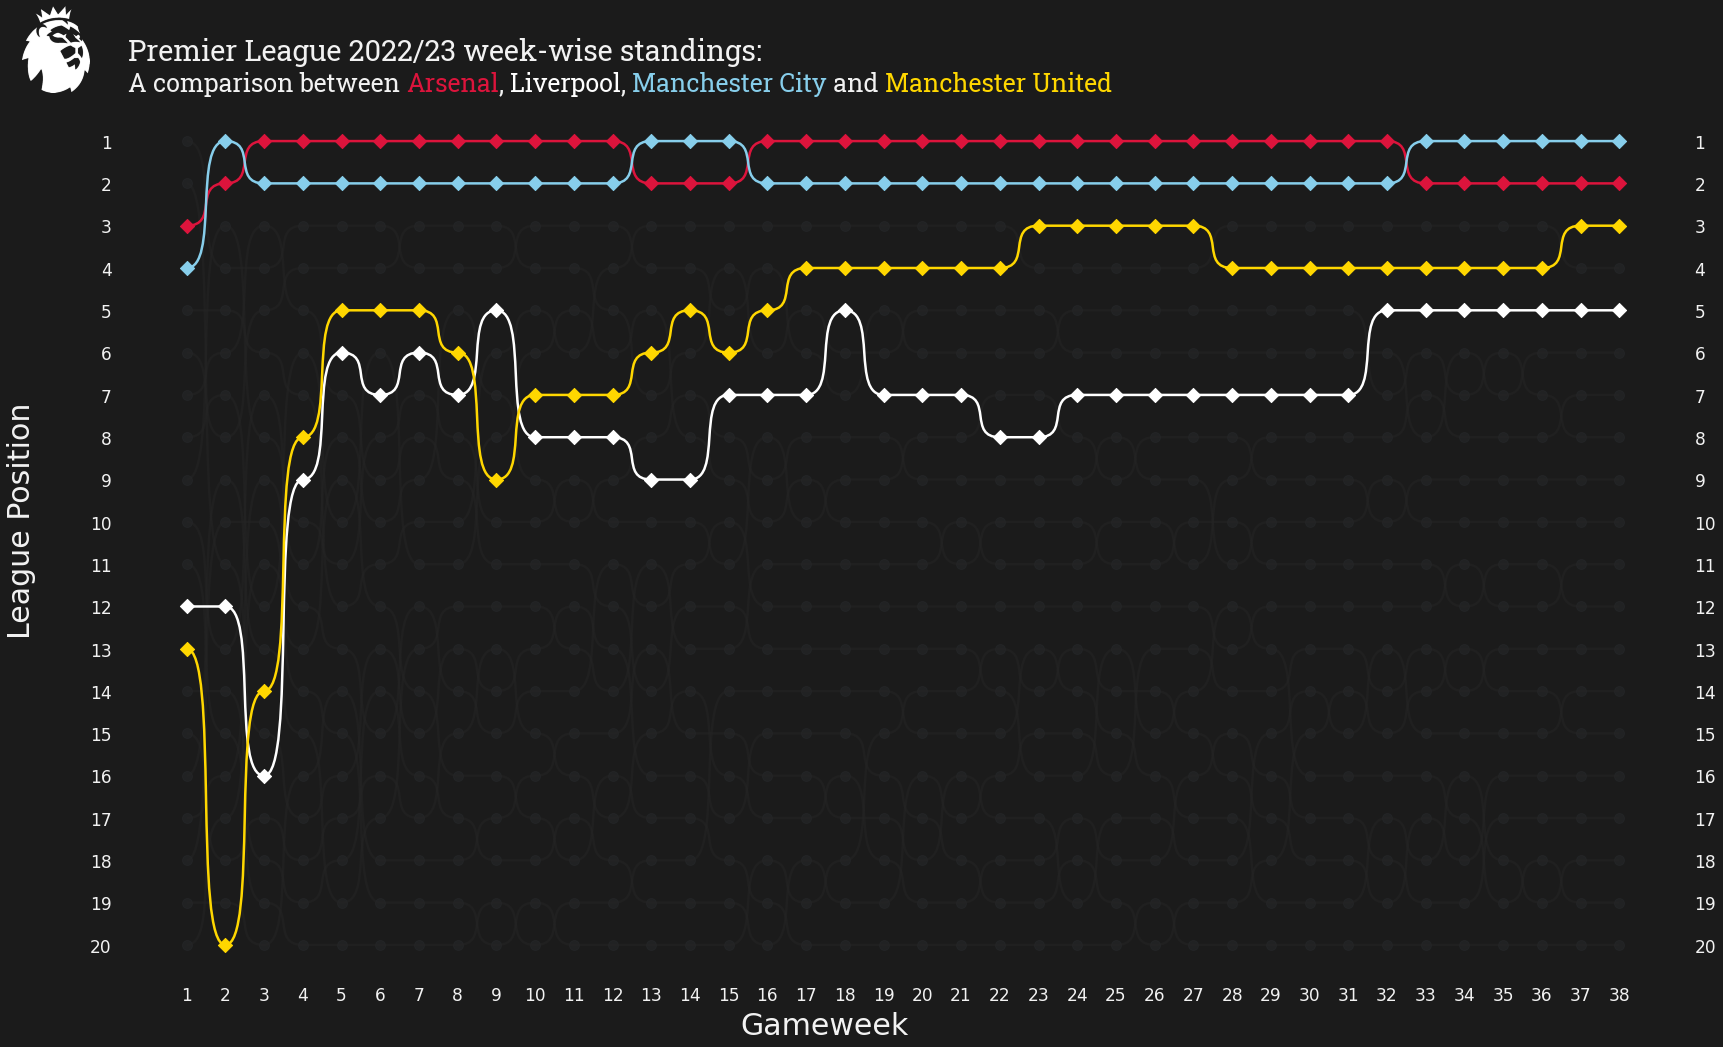

In [21]:
match_day = [str(num) for num in range(1, 39)]


highlight_dict = {
    "Liverpool FC": "white",
    "Manchester City": "skyblue",
    "Manchester United": "gold",
    "Arsenal FC": "crimson"
}

bumpy = Bumpy(
        scatter_color = "#282A2C", line_color = "#252525",
    rotate_xticks = 0, ticklabel_size = 17, label_size = 30,
    scatter_primary = 'D', show_right = True, plot_labels = True,
    alignment_yvalue = 0.1, alignment_xvalue = 0.065
)

fig,ax = bumpy.plot(
    x_list = match_day,
    y_list = np.linspace(1, 20, 20).astype(int),
    values = ult_df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (25,15),
    y_label = 'League Position',
    x_label = 'Gameweek',
    ylim = (0.1,22),
    lw = 2.5
)

ax.xaxis.set_label_coords(0.45, -0.03)
ax.yaxis.set_label_coords(-.05, 0.5)

TITLE = "Premier League 2022/23 week-wise standings:"
SUB_TITLE = "A comparison between <Arsenal>, <Liverpool>, <Manchester City> and <Manchester United>"


fig.text(0.09, 0.95, TITLE, size = 29, color = "#F2F2F2", fontproperties = font_bold.prop)

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color = "#F2F2F2",
    highlight_textprops = [{"color": 'crimson'}, {"color": 'white'}, {"color": 'skyblue'},
                        {"color": 'gold'}],
    size = 25, fig = fig, fontproperties = font_bold.prop
)

# add image
fig = add_image(
     epl,
     fig,  
     0.01, 0.92,
     0.08, 0.08
)


plt.tight_layout(pad=5)

<h1> Scatter Plot </h1>

In [22]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import seaborn as sns
import os
import datetime
import json
from PIL import Image
from urllib.request import urlopen

In [23]:
from matplotlib.colors import ListedColormap
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen, add_image)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

In [24]:
url = "https://understat.com/player/8260" #Understat
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

In [25]:
scripts = soup.find_all('script')[3]

In [26]:
strings = scripts.string

In [27]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22354876\\x22,\\x22minute\\x22\\x3A\\x2258\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8880000305175781\\x22,\\x22Y\\x22\\x3A\\x220.6659999847412109\\x22,\\x22xG\\x22\\x3A\\x220.07933320105075836\\x22,\\x22player\\x22\\x3A\\x22Erling\\x20Haaland\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x228260\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222019\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2212562\\x22,\\x22h_team\\x22\\x3A\\x22Augsburg\\x22,\\x22a_team\\x22\\x3A\\x22Borussia\\x20Dortmund\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x225\\x22,\\x22date\\x22\\x3A\\x222020\\x2D01\\x2D18\\x2014\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Jadon\\x20Sancho\\x22,\\x22lastAction\\x22\\x3A\\x22Throughball\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22354881\\x22,\\x22minute\\x22\\x3A\\x2269\\x22,\\x22result\\x22\\x3A\\

In [28]:
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

In [29]:
json_data

'[{"id":"354876","minute":"58","result":"Goal","X":"0.8880000305175781","Y":"0.6659999847412109","xG":"0.07933320105075836","player":"Erling Haaland","h_a":"a","player_id":"8260","situation":"OpenPlay","season":"2019","shotType":"LeftFoot","match_id":"12562","h_team":"Augsburg","a_team":"Borussia Dortmund","h_goals":"3","a_goals":"5","date":"2020-01-18 14:30:00","player_assisted":"Jadon Sancho","lastAction":"Throughball"},{"id":"354881","minute":"69","result":"Goal","X":"0.98","Y":"0.48900001525878906","xG":"0.9206209778785706","player":"Erling Haaland","h_a":"a","player_id":"8260","situation":"OpenPlay","season":"2019","shotType":"LeftFoot","match_id":"12562","h_team":"Augsburg","a_team":"Borussia Dortmund","h_goals":"3","a_goals":"5","date":"2020-01-18 14:30:00","player_assisted":"Thorgan Hazard","lastAction":"Pass"},{"id":"354883","minute":"78","result":"Goal","X":"0.8830000305175781","Y":"0.34700000762939454","xG":"0.32283100485801697","player":"Erling Haaland","h_a":"a","player_id

In [30]:
df = pd.read_json(json_data)

In [31]:
df_final = df[((df.a_team == 'Manchester City') | (df.h_team == 'Manchester City')) & (df.result == 'Goal')]

In [32]:
df_final.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
206,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,None,Standard
207,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
213,482581,59,Goal,0.967,0.567,0.541526,Erling Haaland,a,8260,FromCorner,2022,LeftFoot,18230,Newcastle United,Manchester City,3,3,2022-08-21 15:30:00,Rodri,Pass
219,483637,61,Goal,0.950,0.500,0.469111,Erling Haaland,h,8260,OpenPlay,2022,Head,18237,Manchester City,Crystal Palace,4,2,2022-08-27 14:00:00,Phil Foden,Chipped
220,483640,69,Goal,0.973,0.563,0.572034,Erling Haaland,h,8260,FromCorner,2022,LeftFoot,18237,Manchester City,Crystal Palace,4,2,2022-08-27 14:00:00,John Stones,Rebound


In [33]:
haaland_url = 'https://www.mancity.com/meta/media/jybffupz/erling-haaland.png'
haaland_img = Image.open(urlopen(haaland_url))

In [34]:
epl = Image.open(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/epl.png")
)

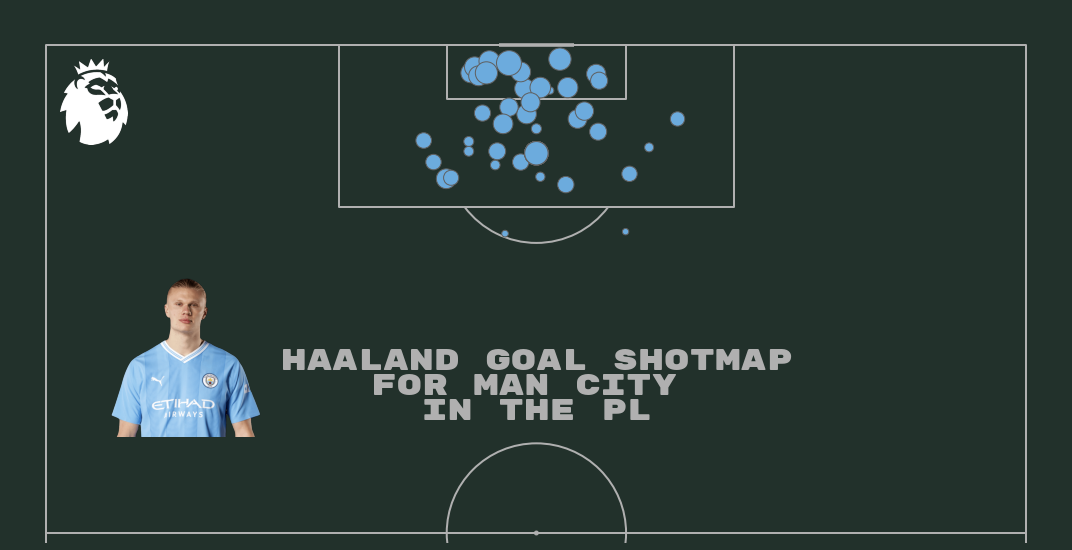

In [35]:
pitch = VerticalPitch(pad_bottom = 1, half = True, goal_type = 'line', goal_alpha = 0.8,
                      pitch_type = 'custom', pitch_length = 99.5, pitch_width = 100)

fig, ax = pitch.draw(figsize = (15, 15))

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

sc = pitch.scatter(df_final.X * 100, df_final.Y * 100, s = df_final.xG * 720,
                   c = '#6CABDD', edgecolors = '#606060', marker = 'o', ax = ax)

txt = ax.text(x = 50, y = 65, s = 'Haaland Goal ShotMap\nfor Man City \nin the PL',
              size = 30, fontproperties = fm_rubik.prop, color = pitch.line_color,
              va = 'center', ha = 'center')

ax_haaland = add_image(haaland_img, fig, interpolation = 'hanning',
                       left = 0.1, bottom = 0.35, height = 0.15)

fig = add_image(epl, fig, 0.05, 0.62, 0.08, 0.08)


<h1> Pass Network </h1>

In [36]:
from statsbombpy import sb

In [37]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import seaborn as sns
import os
import datetime
import json
from PIL import Image
from urllib.request import urlopen

In [38]:
from matplotlib.colors import ListedColormap
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen, add_image)
import math
from matplotlib.colors import to_rgba

In [39]:
comp = sb.matches(competition_id= 37, season_id= 90)

In [40]:
comp[comp.match_id == 3775622]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
7,3775622,2021-04-25,13:30:00.000,England - FA Women's Super League,2020/2021,Manchester United,Tottenham Hotspur Women,4,1,available,...,2021-06-13T16:17:31.694,20,Regular Season,Leigh Sports Village Stadium,Christina Hattersley,Casey Stoney,Rehanne Skinner,1.1.0,2,2


In [41]:
event = sb.events(match_id=3775622, split=True, flatten_attrs=False)['passes']

In [42]:
event[event.possession_team == 'Manchester United']

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,duration,related_events,pass,match_id,possession_team_id,team_id,player_id,under_pressure,off_camera,counterpress
0,76fa7725-9b5f-43ea-81b1-1bd7c9829c34,5,1,00:00:00.200,0,0,Pass,2,Manchester United,From Kick Off,...,1.033964,[846dcf17-097a-4e53-b2e8-e42e6ccbd973],"{'recipient': {'id': 31540, 'name': 'Katie Zel...",3775622,1475,1475,6817,NaN,NaN,NaN
1,f0389273-b8c8-4a92-a002-677f0742855e,8,1,00:00:02.256,0,2,Pass,2,Manchester United,From Kick Off,...,1.606682,[35af65b6-024e-4d24-b207-f7ce93bc1ac8],"{'recipient': {'id': 46639, 'name': 'Ona Batll...",3775622,1475,1475,31540,NaN,NaN,NaN
2,a86ad591-93e7-43d5-b38a-12033adbabe1,12,1,00:00:04.166,0,4,Pass,2,Manchester United,From Kick Off,...,2.113377,[3b60f30b-5644-4b19-800a-53d86c4fa698],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,46639,NaN,NaN,NaN
3,60d7e1e3-c4a5-448e-bba6-7192150a152d,15,1,00:00:09.220,0,9,Pass,2,Manchester United,From Kick Off,...,1.702840,[a488c1fe-1df6-49d9-8a02-9efa96d6bcb6],"{'recipient': {'id': 46639, 'name': 'Ona Batll...",3775622,1475,1475,31533,NaN,NaN,NaN
4,9c174378-1962-4d2d-9824-2f150366384c,18,1,00:00:12.974,0,12,Pass,2,Manchester United,From Kick Off,...,2.381125,[1a22ae42-fc31-4f89-86cb-038d1d78b896],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,46639,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,f30faef6-825b-4b25-9f0d-ce5746bad098,3174,2,00:45:46.057,90,46,Pass,208,Manchester United,Regular Play,...,1.435438,"[5cb70b50-2f83-46d7-8bb1-5f3c4fde2940, c750e25...","{'recipient': {'id': 4653, 'name': 'Jane Ross'...",3775622,1475,1475,10654,True,NaN,NaN
829,fa287f47-98ca-45cf-bff7-37046e54de1a,3178,2,00:45:50.391,90,50,Pass,208,Manchester United,Regular Play,...,0.549911,"[0821aaf9-3489-4493-b86d-e1b481ff121d, b84c14f...","{'recipient': {'id': 31532, 'name': 'Kirsty Ha...",3775622,1475,1475,4653,True,NaN,NaN
830,80b9d283-966c-4624-9a6a-20ab37bd360b,3181,2,00:46:07.193,91,7,Pass,209,Manchester United,From Throw In,...,3.575808,"[92cb6009-f845-41a6-aa9c-de09aa2c103b, da678d9...","{'recipient': {'id': 84765, 'name': 'Carrie Jo...",3775622,1475,1475,4636,NaN,NaN,NaN
845,09a76d82-2408-48c9-be14-56e770186fec,3232,2,00:48:14.274,93,14,Pass,212,Manchester United,From Kick Off,...,2.235385,[db7e8c72-54b0-42f3-acdc-644cb6570327],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,84765,NaN,True,NaN


In [43]:
event.groupby('possession_team')['pass'].count()

possession_team
Manchester United          424
Tottenham Hotspur Women    423
Name: pass, dtype: int64

In [44]:
event['pass'].head()

0    {'recipient': {'id': 31540, 'name': 'Katie Zel...
1    {'recipient': {'id': 46639, 'name': 'Ona Batll...
2    {'recipient': {'id': 31533, 'name': 'Amy Turne...
3    {'recipient': {'id': 46639, 'name': 'Ona Batll...
4    {'recipient': {'id': 31533, 'name': 'Amy Turne...
Name: pass, dtype: object

In [45]:
recipient = event['pass'].apply(pd.Series)

In [46]:
recipient[['recipient', 'length', 'angle', 'height', 'end_location', 'type',
       'body_part', 'outcome', 'assisted_shot_id', 'shot_assist',
       'through_ball', 'technique', 'aerial_won', 'cross', 'cut_back']]

,recipient,length,angle,height,end_location,type,body_part,outcome,assisted_shot_id,shot_assist,through_ball,technique,aerial_won,cross,cut_back
0,"{'id': 31540, 'name': 'Katie Zelem'}",12.277622,2.783775,"{'id': 1, 'name': 'Ground Pass'}","[49.5, 44.4]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",25.234303,1.674014,"{'id': 1, 'name': 'Ground Pass'}","[45.8, 69.5]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'id': 31533, 'name': 'Amy Turner'}",17.725970,-2.472138,"{'id': 1, 'name': 'Ground Pass'}","[32.1, 58.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",21.918030,1.086743,"{'id': 1, 'name': 'Ground Pass'}","[47.5, 77.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'id': 31533, 'name': 'Amy Turner'}",13.371985,-2.684634,"{'id': 1, 'name': 'Ground Pass'}","[35.1, 64.9]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,"{'id': 53440, 'name': 'Esther Morgan'}",18.346935,1.185229,"{'id': 1, 'name': 'Ground Pass'}","[94.7, 65.2]",NaN,"{'id': 106, 'name': 'No Touch'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,NaN,29.756680,-1.439355,"{'id': 3, 'name': 'High Pass'}","[105.9, 35.1]",NaN,"{'id': 40, 'name': 'Right Foot'}","{'id': 9, 'name': 'Incomplete'}",NaN,NaN,NaN,NaN,NaN,True,NaN
844,"{'id': 21048, 'name': 'Rosella Ayane'}",8.260751,-1.449444,"{'id': 1, 'name': 'Ground Pass'}","[88.4, 37.1]","{'id': 66, 'name': 'Recovery'}","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,"{'id': 31533, 'name': 'Amy Turner'}",34.866173,3.017949,"{'id': 1, 'name': 'Ground Pass'}","[25.4, 44.3]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
event['pass'].apply(pd.Series)

,recipient,length,angle,height,end_location,type,body_part,outcome,assisted_shot_id,shot_assist,...,technique,aerial_won,cross,cut_back,goal_assist,switch,inswinging,miscommunication,deflected,no_touch
0,"{'id': 31540, 'name': 'Katie Zelem'}",12.277622,2.783775,"{'id': 1, 'name': 'Ground Pass'}","[49.5, 44.4]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",25.234303,1.674014,"{'id': 1, 'name': 'Ground Pass'}","[45.8, 69.5]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'id': 31533, 'name': 'Amy Turner'}",17.725970,-2.472138,"{'id': 1, 'name': 'Ground Pass'}","[32.1, 58.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",21.918030,1.086743,"{'id': 1, 'name': 'Ground Pass'}","[47.5, 77.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'id': 31533, 'name': 'Amy Turner'}",13.371985,-2.684634,"{'id': 1, 'name': 'Ground Pass'}","[35.1, 64.9]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,"{'id': 53440, 'name': 'Esther Morgan'}",18.346935,1.185229,"{'id': 1, 'name': 'Ground Pass'}","[94.7, 65.2]",NaN,"{'id': 106, 'name': 'No Touch'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
843,NaN,29.756680,-1.439355,"{'id': 3, 'name': 'High Pass'}","[105.9, 35.1]",NaN,"{'id': 40, 'name': 'Right Foot'}","{'id': 9, 'name': 'Incomplete'}",NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,"{'id': 21048, 'name': 'Rosella Ayane'}",8.260751,-1.449444,"{'id': 1, 'name': 'Ground Pass'}","[88.4, 37.1]","{'id': 66, 'name': 'Recovery'}","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,"{'id': 31533, 'name': 'Amy Turner'}",34.866173,3.017949,"{'id': 1, 'name': 'Ground Pass'}","[25.4, 44.3]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
name_id = recipient['recipient'].apply(pd.Series)
name_id.head()

,0,id,name
0,NaN,31540.0,Katie Zelem
1,NaN,46639.0,Ona Batlle Pascual
2,NaN,31533.0,Amy Turner
3,NaN,46639.0,Ona Batlle Pascual
4,NaN,31533.0,Amy Turner


In [49]:
final_name_id = name_id[['id', 'name']]
final_name_id = final_name_id.rename(columns = {'id': 'name_id', 'name': 'end_player'})

In [50]:
end_location = recipient['end_location'].apply(pd.Series)
end_location = end_location.rename(columns = {0: 'end_x', 1 : 'end_y'})

In [51]:
name_end = pd.concat([final_name_id,end_location], 1)
name_end.head()

,name_id,end_player,end_x,end_y
0,31540.0,Katie Zelem,49.5,44.4
1,46639.0,Ona Batlle Pascual,45.8,69.5
2,31533.0,Amy Turner,32.1,58.7
3,46639.0,Ona Batlle Pascual,47.5,77.7
4,31533.0,Amy Turner,35.1,64.9


In [52]:
final_df = pd.concat([event, name_end], 1)

In [53]:
final_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'pass',
       'match_id', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'off_camera', 'counterpress', 'name_id', 'end_player',
       'end_x', 'end_y'],
      dtype='object')

In [54]:
location = final_df['location'].apply(pd.Series)
location = location.rename(columns = {0 : 'start_x', 1 : 'start_y'})

In [55]:
location.head()

,start_x,start_y
0,61.0,40.1
1,48.4,44.4
2,46.0,69.7
3,37.3,58.3
4,47.1,70.8


In [56]:
final_df = final_df.rename(columns = {'player' : 'start_player'})

In [57]:
final_df = pd.concat([ final_df, location], 1)

In [58]:
final_df = final_df[final_df.possession_team == 'Manchester United']

In [59]:
final_df

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,player_id,under_pressure,off_camera,counterpress,name_id,end_player,end_x,end_y,start_x,start_y
0,76fa7725-9b5f-43ea-81b1-1bd7c9829c34,5,1,00:00:00.200,0,0,Pass,2,Manchester United,From Kick Off,...,6817,NaN,NaN,NaN,31540.0,Katie Zelem,49.5,44.4,61.0,40.1
1,f0389273-b8c8-4a92-a002-677f0742855e,8,1,00:00:02.256,0,2,Pass,2,Manchester United,From Kick Off,...,31540,NaN,NaN,NaN,46639.0,Ona Batlle Pascual,45.8,69.5,48.4,44.4
2,a86ad591-93e7-43d5-b38a-12033adbabe1,12,1,00:00:04.166,0,4,Pass,2,Manchester United,From Kick Off,...,46639,NaN,NaN,NaN,31533.0,Amy Turner,32.1,58.7,46.0,69.7
3,60d7e1e3-c4a5-448e-bba6-7192150a152d,15,1,00:00:09.220,0,9,Pass,2,Manchester United,From Kick Off,...,31533,NaN,NaN,NaN,46639.0,Ona Batlle Pascual,47.5,77.7,37.3,58.3
4,9c174378-1962-4d2d-9824-2f150366384c,18,1,00:00:12.974,0,12,Pass,2,Manchester United,From Kick Off,...,46639,NaN,NaN,NaN,31533.0,Amy Turner,35.1,64.9,47.1,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,f30faef6-825b-4b25-9f0d-ce5746bad098,3174,2,00:45:46.057,90,46,Pass,208,Manchester United,Regular Play,...,10654,True,NaN,NaN,4653.0,Jane Ross,52.0,58.4,35.5,54.4
829,fa287f47-98ca-45cf-bff7-37046e54de1a,3178,2,00:45:50.391,90,50,Pass,208,Manchester United,Regular Play,...,4653,True,NaN,NaN,31532.0,Kirsty Hanson,67.1,72.1,55.1,73.2
830,80b9d283-966c-4624-9a6a-20ab37bd360b,3181,2,00:46:07.193,91,7,Pass,209,Manchester United,From Throw In,...,4636,NaN,NaN,NaN,84765.0,Carrie Jones,98.8,65.7,65.6,80.0
845,09a76d82-2408-48c9-be14-56e770186fec,3232,2,00:48:14.274,93,14,Pass,212,Manchester United,From Kick Off,...,84765,NaN,True,NaN,31533.0,Amy Turner,25.4,44.3,60.0,40.0


In [60]:
final_df.groupby('start_player').mean('start_x')

,index,period,minute,second,possession,duration,match_id,possession_team_id,team_id,player_id,name_id,end_x,end_y,start_x,start_y
start_player,,,,,,,,,,,,,,,
Alanna Stephanie Kennedy,1587.000000,1.000000,40.000000,54.000000,94.000000,1.357109,3775622.0,1475.0,749.0,5078.0,31551.000000,11.400000,47.200000,7.100000,54.200000
Amy Turner,1408.108108,1.378378,36.810811,24.486486,90.054054,1.632032,3775622.0,1475.0,1475.0,31533.0,31726.085714,36.451351,51.829730,31.578378,53.824324
Ashleigh Neville,1972.000000,1.750000,50.500000,50.000000,118.250000,1.912619,3775622.0,1475.0,749.0,4848.0,24860.500000,44.325000,62.475000,27.300000,63.500000
Carrie Jones,3190.000000,2.000000,91.000000,32.500000,209.000000,1.990467,3775622.0,1475.0,1475.0,84765.0,18084.500000,61.350000,58.600000,73.850000,48.500000
Christen Annemarie Press,1214.190476,1.285714,31.857143,30.428571,81.952381,2.028341,3775622.0,1475.0,1475.0,6817.0,28356.894737,79.923810,46.661905,70.738095,52.176190
Ella Toone,1633.243902,1.439024,42.560976,32.756098,104.219512,1.440667,3775622.0,1475.0,1475.0,31534.0,30576.783784,76.441463,56.141463,70.673171,55.253659
Jackie Groenen,2848.285714,2.000000,79.357143,24.642857,185.071429,2.152514,3775622.0,1475.0,1475.0,10654.0,29851.857143,54.407143,50.907143,41.492857,45.114286
Jane Ross,2758.333333,2.000000,76.333333,41.333333,177.166667,1.506096,3775622.0,1475.0,1475.0,4653.0,29609.500000,69.566667,44.800000,65.116667,43.500000
Jessica Naz,875.666667,1.000000,22.333333,9.000000,60.000000,2.423823,3775622.0,1475.0,749.0,61467.0,31702.000000,76.566667,32.966667,79.833333,53.633333


In [61]:
# average_locations = 
mean_x = final_df.groupby('start_player').mean()['start_x']
mean_y = final_df.groupby('start_player').mean()['start_y']
mean_count = final_df.groupby('start_player').count()['start_y']

In [62]:
mean_count = mean_count.rename('count')

In [63]:
average_locs_and_count = pd.concat([mean_x, mean_y, mean_count], axis=1)

In [64]:
average_locs_and_count.rename(columns={average_locs_and_count.columns.tolist()[2]: 'count'},  inplace=True)

In [65]:
average_locs_and_count.head()

,start_x,start_y,count
start_player,,,
Alanna Stephanie Kennedy,7.100000,54.200000,1
Amy Turner,31.578378,53.824324,37
Ashleigh Neville,27.300000,63.500000,4
Carrie Jones,73.850000,48.500000,2
Christen Annemarie Press,70.738095,52.176190,21


In [66]:
average_locs_and_count = average_locs_and_count[average_locs_and_count['count'] > 15]

In [67]:
passes_between = final_df.groupby(['start_player', 'end_player']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

average_locs_and_count.index = average_locs_and_count.index.astype(str)  

passes_between = passes_between.merge(average_locs_and_count, left_on='start_player', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='end_player', right_index=True,
                                      suffixes=['', '_end'])

In [68]:
passes_between.head()

,start_player,end_player,pass_count,start_x,start_y,count,start_x_end,start_y_end,count_end
1,Amy Turner,Ella Toone,3,31.578378,53.824324,37,70.673171,55.253659,41
14,Christen Annemarie Press,Ella Toone,6,70.738095,52.176190,21,70.673171,55.253659,41
42,Jessica Sigsworth,Ella Toone,2,75.788889,68.822222,18,70.673171,55.253659,41
49,Katie Zelem,Ella Toone,3,50.623077,51.561538,26,70.673171,55.253659,41
57,Kirsty Hanson,Ella Toone,5,91.425000,33.655000,20,70.673171,55.253659,41


In [69]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

In [70]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

In [71]:
average_locs_and_count['shirt_num'] = ['4', '24', '7', '9', '10', '18', '20', '37', '27', '21', '2']

In [72]:
event.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,duration,related_events,pass,match_id,possession_team_id,team_id,player_id,under_pressure,off_camera,counterpress
0,76fa7725-9b5f-43ea-81b1-1bd7c9829c34,5,1,00:00:00.200,0,0,Pass,2,Manchester United,From Kick Off,...,1.033964,[846dcf17-097a-4e53-b2e8-e42e6ccbd973],"{'recipient': {'id': 31540, 'name': 'Katie Zel...",3775622,1475,1475,6817,NaN,NaN,NaN
1,f0389273-b8c8-4a92-a002-677f0742855e,8,1,00:00:02.256,0,2,Pass,2,Manchester United,From Kick Off,...,1.606682,[35af65b6-024e-4d24-b207-f7ce93bc1ac8],"{'recipient': {'id': 46639, 'name': 'Ona Batll...",3775622,1475,1475,31540,NaN,NaN,NaN
2,a86ad591-93e7-43d5-b38a-12033adbabe1,12,1,00:00:04.166,0,4,Pass,2,Manchester United,From Kick Off,...,2.113377,[3b60f30b-5644-4b19-800a-53d86c4fa698],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,46639,NaN,NaN,NaN
3,60d7e1e3-c4a5-448e-bba6-7192150a152d,15,1,00:00:09.220,0,9,Pass,2,Manchester United,From Kick Off,...,1.702840,[a488c1fe-1df6-49d9-8a02-9efa96d6bcb6],"{'recipient': {'id': 46639, 'name': 'Ona Batll...",3775622,1475,1475,31533,NaN,NaN,NaN
4,9c174378-1962-4d2d-9824-2f150366384c,18,1,00:00:12.974,0,12,Pass,2,Manchester United,From Kick Off,...,2.381125,[1a22ae42-fc31-4f89-86cb-038d1d78b896],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,46639,NaN,NaN,NaN


In [73]:
passes_between.head()

,start_player,end_player,pass_count,start_x,start_y,count,start_x_end,start_y_end,count_end,width
1,Amy Turner,Ella Toone,3,31.578378,53.824324,37,70.673171,55.253659,41,2.571429
14,Christen Annemarie Press,Ella Toone,6,70.738095,52.176190,21,70.673171,55.253659,41,5.142857
42,Jessica Sigsworth,Ella Toone,2,75.788889,68.822222,18,70.673171,55.253659,41,1.714286
49,Katie Zelem,Ella Toone,3,50.623077,51.561538,26,70.673171,55.253659,41,2.571429
57,Kirsty Hanson,Ella Toone,5,91.425000,33.655000,20,70.673171,55.253659,41,4.285714


In [74]:
average_locs_and_count.head()

,start_x,start_y,count,marker_size,shirt_num
start_player,,,,,
Amy Turner,31.578378,53.824324,37,1608.695652,4
Christen Annemarie Press,70.738095,52.176190,21,913.043478,24
Ella Toone,70.673171,55.253659,41,1782.608696,7
Jessica Sigsworth,75.788889,68.822222,18,782.608696,9
Katie Zelem,50.623077,51.561538,26,1130.434783,10


In [75]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

In [76]:
TEAM = "Manchester United Women's"
FORMATION = '4-2-3-1'
OPPONENT = 'versus Tottenham Hotspurs (H), 2020/21 FA WSL'

In [77]:
URL = "https://raw.githubusercontent.com/google/fonts/main/ofl/oswald/Oswald%5Bwght%5D.ttf"
oswald_regular = FontManager(URL)

In [78]:
utd_url = 'https://upload.wikimedia.org/wikibooks/en/thumb/7/7a/Manchester_United_FC_crest.svg/444px-Manchester_United_FC_crest.svg.png?20120608120049'
utd_img = Image.open(urlopen(utd_url))
spurs_url = 'https://upload.wikimedia.org/wikipedia/en/thumb/0/05/Spurs_2017_badge.svg/800px-Spurs_2017_badge.svg.png'
spurs_img = Image.open(urlopen(spurs_url))
fa_url = 'https://upload.wikimedia.org/wikipedia/en/4/4f/FA_Women%27s_Super_League.png'
fa_img = Image.open(urlopen(fa_url))

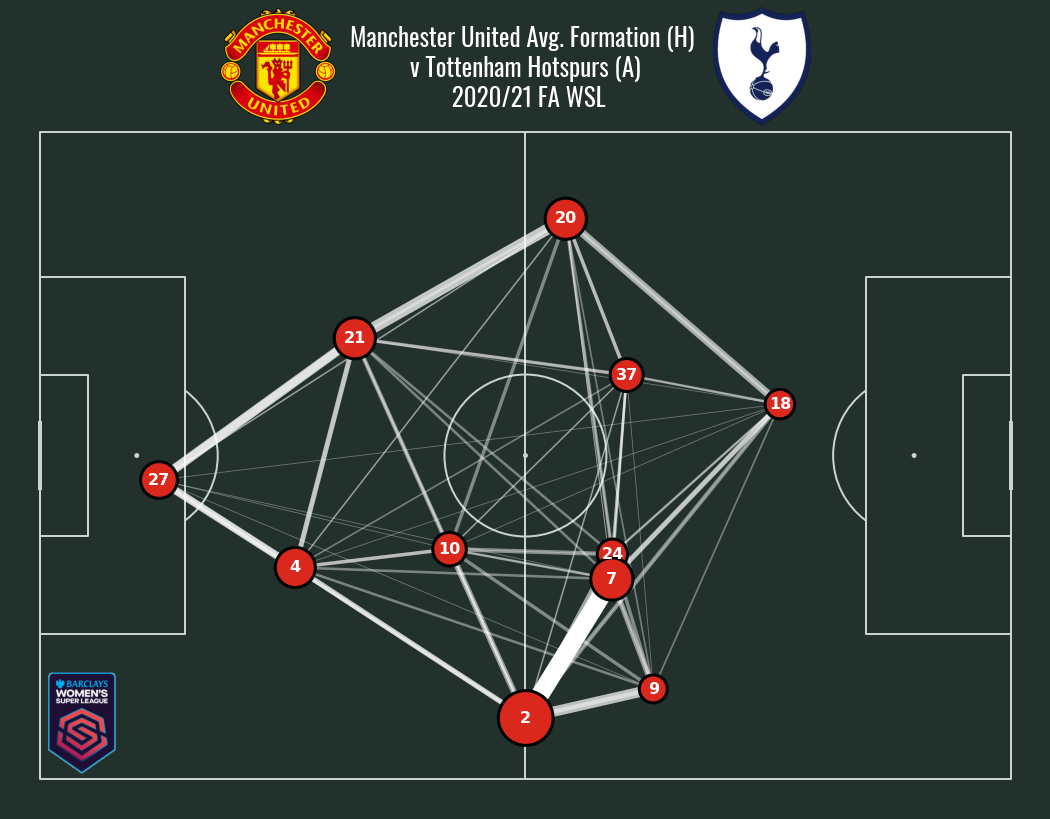

In [79]:
pitch = Pitch(pitch_type = 'statsbomb', pitch_color = '#22312b', line_color = '#c7d5cc')

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout = True, tight_layout = False)

fig.set_facecolor("#22312b")

pass_lines = pitch.lines(passes_between.start_x, passes_between.start_y,
                         passes_between.start_x_end, passes_between.start_y_end, lw = passes_between.width,
                         color = color, zorder = 1, ax = ax)

pass_nodes = pitch.scatter(average_locs_and_count.start_x, average_locs_and_count.start_y,
                           s = average_locs_and_count.marker_size,
                           color = '#DA291C', edgecolors = 'black', linewidth = 3, alpha = 1, ax = ax)

for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.shirt_num, xy = (row.start_x, row.start_y), c = 'white', va = 'center',
                   ha = 'center', size = 16, weight = 'bold', ax = ax)


fig1 = add_image(
     utd_img,
     fig,  
     0.21, 0.87,  
     0.15, 0.15 
)

fig2 = add_image(
     spurs_img,
     fig,  
     0.63, 0.87,  
     0.15, 0.15  
)

fig3 = add_image(
     fa_img,
     fig,  
     0.05, 0.05, 
     0.13, 0.13  
)

ax.set_title("Manchester United Avg. Formation (H) \nv Tottenham Hotspurs (A)\n 2020/21 FA WSL",
             fontsize = 25, color = "w", fontproperties = oswald_regular.prop, fontweight = 'bold', pad = -8);

<h1> Kernel Density Plot </h1>

In [80]:
from urllib.request import urlopen
from statsbombpy import sb
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import ax_text
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import math

from mplsoccer import VerticalPitch, add_image, FontManager, Sbopen, Pitch

In [81]:
comp = sb.competitions()

In [82]:
comp[comp.competition_id == 43].head(1)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
26,43,106,International,FIFA World Cup,male,False,True,2022,2023-08-12T16:44:27.619465,2023-08-17T15:55:15.164685,2023-08-17T15:55:15.164685,2023-08-12T16:44:27.619465


In [83]:
matches = sb.matches(competition_id = 43, season_id = 106)

In [84]:
matches[(matches.home_team == 'Argentina') | (matches.away_team == 'Argentina')]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2
11,3857264,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Poland,Argentina,0,2,available,...,2023-07-25T09:10:13.832053,3,Group Stage,Stadium 974,Danny Desmond Makkelie,Czesław Michniewicz,Lionel Sebastián Scaloni,1.1.0,2,2
13,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,...,2023-06-20T11:57:08.547882,2,Group Stage,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Gerardo Daniel Martino,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,...,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
37,3857300,2022-11-22,12:00:00.000,International - FIFA World Cup,2022,Argentina,Saudi Arabia,1,2,available,...,2023-06-19T15:59:46.628887,1,Group Stage,Lusail Stadium,Slavko Vinčić,Lionel Sebastián Scaloni,Hervé Renard,1.1.0,2,2


In [85]:
sb.events(match_id=3869685, split=True, flatten_attrs=False).keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'foul_committeds', 'foul_wons', 'ball_recoverys', 'blocks', 'miscontrols', 'clearances', 'duels', 'interceptions', 'dribbles', 'shots', 'goal_keepers', 'dispossesseds', 'dribbled_pasts', 'injury_stoppages', 'player_offs', 'player_ons', 'offsides', 'substitutions', 'tactical_shifts', 'shields', '50/50s', 'half_ends', 'bad_behaviours'])

In [86]:
foul_wons = sb.events(match_id=3869685, split=True, flatten_attrs=False)['foul_wons']

In [87]:
pressures = sb.events(match_id=3869685, split=True, flatten_attrs=False)['pressures']

In [88]:
ball_receipts = sb.events(match_id=3869685, split=True, flatten_attrs=False)['ball_receipts']

In [89]:
carrys = sb.events(match_id=3869685, split=True, flatten_attrs=False)['carrys']

In [90]:
passes = sb.events(match_id=3869685, split=True, flatten_attrs=False)['passes']

In [91]:
# foul_wons,pressures,ball_receipts,carrys,passes

In [92]:
messi_foul_wons = foul_wons[foul_wons.player == 'Lionel Andrés Messi Cuccittini']['location'].apply(pd.Series)

In [93]:
messi_pressures = pressures[pressures.player == 'Lionel Andrés Messi Cuccittini']['location'].apply(pd.Series)

In [94]:
messi_ball_receipts = ball_receipts[ball_receipts.player == 'Lionel Andrés Messi Cuccittini']['location'].apply(pd.Series)

In [95]:
messi_carrys = carrys[carrys.player == 'Lionel Andrés Messi Cuccittini']['location'].apply(pd.Series)

In [96]:
messi_passes = passes[passes.player == 'Lionel Andrés Messi Cuccittini']['location'].apply(pd.Series)

In [97]:
x_y = pd.concat([messi_passes, messi_carrys, messi_ball_receipts, messi_pressures, messi_foul_wons], axis = 0)

In [98]:
x_y = x_y.rename(columns = {0 : 'start_x', 1 : 'start_y'})

In [99]:
x_y.reset_index()

,index,start_x,start_y
0,24,76.6,35.7
1,27,99.3,57.3
2,40,67.9,59.0
3,50,81.8,65.2
4,91,39.2,48.1
...,...,...,...
201,323,86.9,49.4
202,324,63.4,47.7
203,341,97.2,56.6
204,3,64.2,43.6


In [100]:
URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robboto_bold = FontManager(URL2)

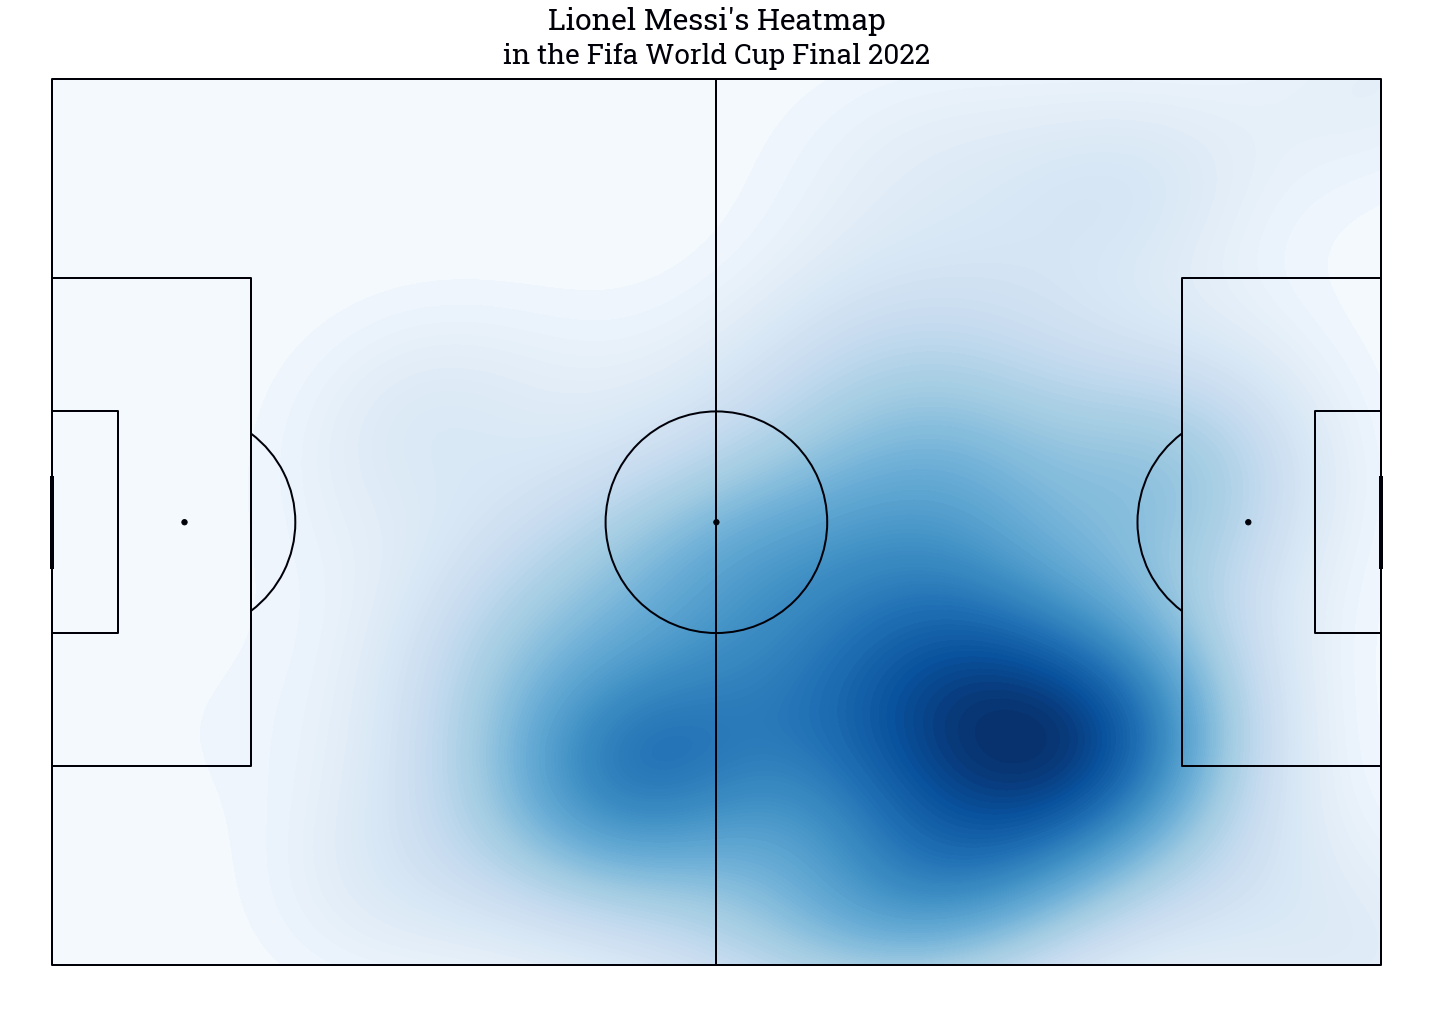

In [101]:
pitch = Pitch(line_color = '#000009', line_zorder = 2)
fig, ax = pitch.draw(figsize = (20,15))
kde = pitch.kdeplot(x_y.start_x, x_y.start_y, ax = ax,
                    fill = True, levels = 100, thresh = 0,
                     cut = 4, cmap = 'Blues')

ax.set_title("Lionel Messi's Heatmap\n", color = '#000009',
              va = 'center', ha = 'center', fontproperties = robboto_bold.prop, fontsize = 30, y = 0.99)

ax.text(60, -2, "in the Fifa World Cup Final 2022", color = '#000009',
              va = 'center', ha = 'center', fontproperties = robboto_bold.prop, fontsize = 28);